In [ ]:
# Count
phishingcount, not_phishingcount=dataset['Result'].value_counts()[1] ,dataset['Result'].value_counts()[0]
print("Number of Phishing URLs",phishingcount)
print("Number of Legit URLs",not_phishingcount)


"""
1.  Gradient Boosting Classifier
2.  SVM (Linear Kernel)
3.  SVM (Polynomial Kernel)
4.  SVM (RBF Kernel)
5.  CNN (Relu as Activation)
6.  CNN (Sigmoid as Activation)
7.  KNN
8.  Logistic Regression
9.  ResNet
10. ResNetV2 Implementation
11. PreActResidual Implementation
12. WideResidual Implementation
13. ResNeXt Implementation
14. DenseNet Implementation
"""


Number of Phishing URLs 6157
Number of Legit URLs 4898


## Gradient Boosting Classifier Implementation

Train - Accuracy: 0.9528, Precision: 0.9498, Recall: 0.9659, F1: 0.9578
Test - Accuracy: 0.9507, Precision: 0.9491, Recall: 0.9649, F1: 0.9569


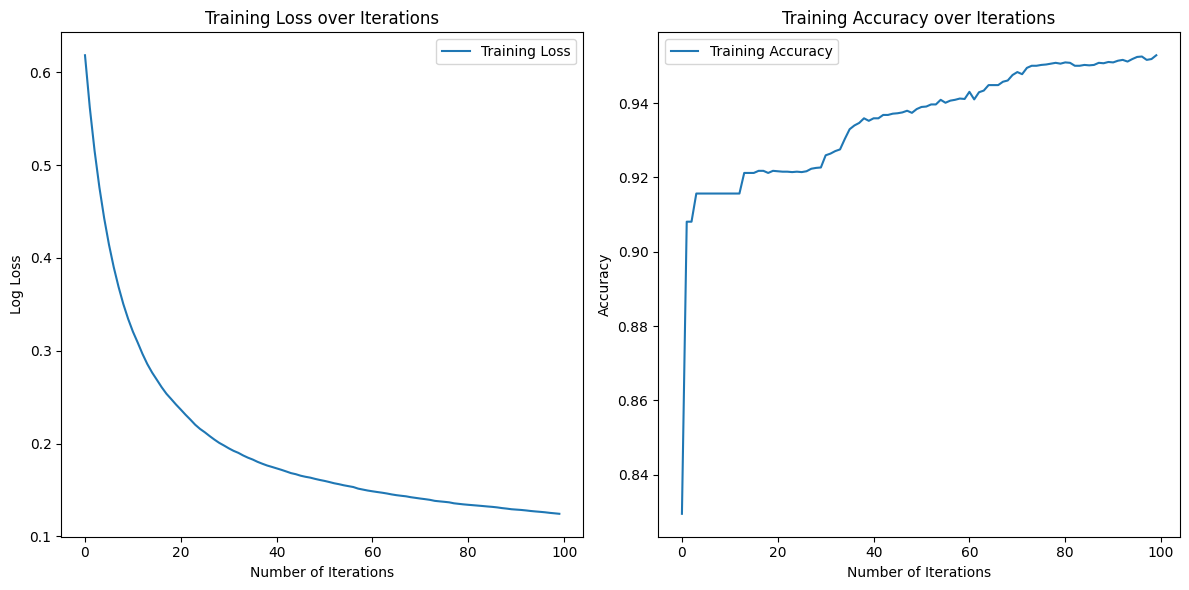

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
import pandas as pd

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Drop the index column
dataset = dataset.drop(columns=['index'])

# Convert target labels -1 to 0
dataset['Result'] = dataset['Result'].replace(-1, 0)

# Split the dataset into features and target
X = dataset.drop(columns=['Result'])
y = dataset['Result']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
def evaluate(model, X, y):
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    f1 = f1_score(y, predictions)
    return accuracy, precision, recall, f1

# Evaluate on training data
train_accuracy, train_precision, train_recall, train_f1 = evaluate(model, X_train, y_train)
print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')

# Evaluate on test data
test_accuracy, test_precision, test_recall, test_f1 = evaluate(model, X_test, y_test)
print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Track training loss and accuracy
training_loss = []
training_accuracy = []

for y_pred_proba in model.staged_predict_proba(X_train):
    training_loss.append(log_loss(y_train, y_pred_proba))
    y_pred = (y_pred_proba[:, 1] >= 0.5).astype(int)
    training_accuracy.append(accuracy_score(y_train, y_pred))

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Log Loss')
plt.title('Training Loss over Iterations')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


## SVM ( LINEAR ) IMPLEMENTATION

Train - Accuracy: 0.9284, Precision: 0.9263, Recall: 0.9461, F1: 0.9361
Test - Accuracy: 0.9285, Precision: 0.9262, Recall: 0.9498, F1: 0.9378


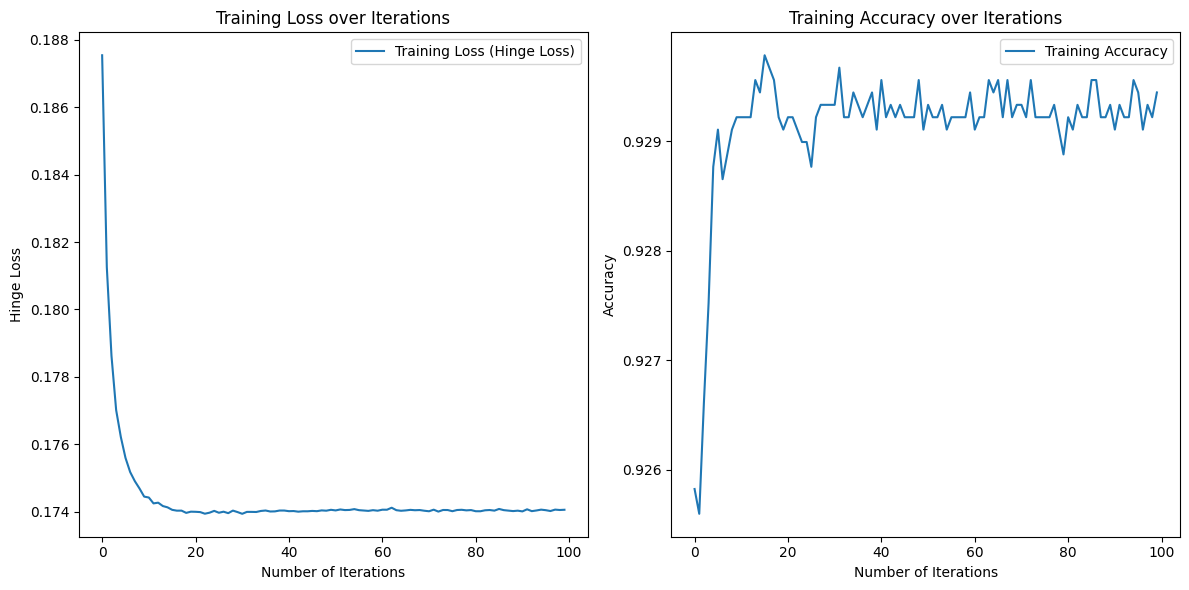

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import hinge_loss
from sklearn.linear_model import SGDClassifier

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Drop the index column
dataset = dataset.drop(columns=['index'])

# Convert target labels -1 to 0
dataset['Result'] = dataset['Result'].replace(-1, 0)

# Split the dataset into features and target
X = dataset.drop(columns=['Result'])
y = dataset['Result']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the SVM model
model = SVC(kernel='linear', C=1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
def evaluate(model, X, y):
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    f1 = f1_score(y, predictions)
    return accuracy, precision, recall, f1

# Evaluate on training data
train_accuracy, train_precision, train_recall, train_f1 = evaluate(model, X_train, y_train)
print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')

# Evaluate on test data
test_accuracy, test_precision, test_recall, test_f1 = evaluate(model, X_test, y_test)
print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Use SGDClassifier to simulate training process with a lower learning rate
sgd_model = SGDClassifier(loss='hinge', alpha=1/(X_train.shape[0]), max_iter=1, tol=None, random_state=42, learning_rate='constant', eta0=0.001)  # Reduced learning rate

training_loss = []
training_accuracy = []

# Simulate training process
for _ in range(100):
    sgd_model.partial_fit(X_train, y_train, classes=[0, 1])
    predictions = sgd_model.predict(X_train)
    training_loss.append(hinge_loss(y_train, sgd_model.decision_function(X_train)))
    training_accuracy.append(accuracy_score(y_train, predictions))

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss (Hinge Loss)')
plt.xlabel('Number of Iterations')
plt.ylabel('Hinge Loss')
plt.title('Training Loss over Iterations')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


## SVM ( POLYNOMIAL ) IMPLEMENTATION

Train - Accuracy: 0.9585, Precision: 0.9511, Recall: 0.9753, F1: 0.9630
Test - Accuracy: 0.9498, Precision: 0.9420, Recall: 0.9713, F1: 0.9565


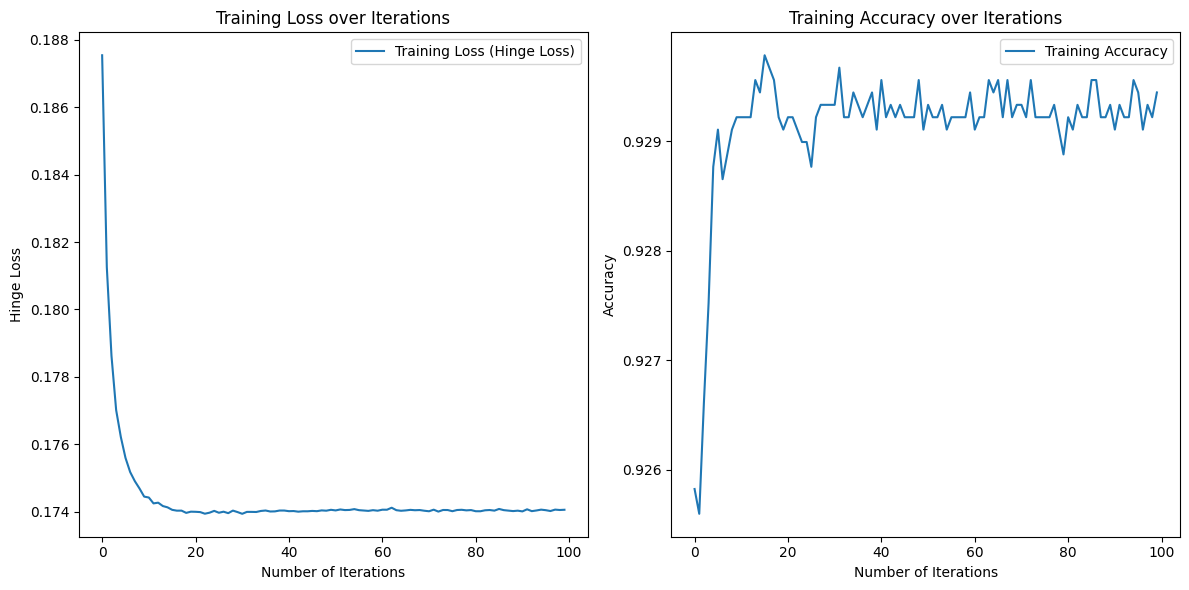

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import hinge_loss
from sklearn.linear_model import SGDClassifier

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Drop the index column
dataset = dataset.drop(columns=['index'])

# Convert target labels -1 to 0
dataset['Result'] = dataset['Result'].replace(-1, 0)

# Split the dataset into features and target
X = dataset.drop(columns=['Result'])
y = dataset['Result']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the SVM model
model = SVC(kernel='poly', C=1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
def evaluate(model, X, y):
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    f1 = f1_score(y, predictions)
    return accuracy, precision, recall, f1

# Evaluate on training data
train_accuracy, train_precision, train_recall, train_f1 = evaluate(model, X_train, y_train)
print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')

# Evaluate on test data
test_accuracy, test_precision, test_recall, test_f1 = evaluate(model, X_test, y_test)
print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Use SGDClassifier to simulate training process with a lower learning rate
sgd_model = SGDClassifier(loss='hinge', alpha=1/(X_train.shape[0]), max_iter=1, tol=None, random_state=42, learning_rate='constant', eta0=0.001)  # Reduced learning rate

training_loss = []
training_accuracy = []

# Simulate training process
for _ in range(100):
    sgd_model.partial_fit(X_train, y_train, classes=[0, 1])
    predictions = sgd_model.predict(X_train)
    training_loss.append(hinge_loss(y_train, sgd_model.decision_function(X_train)))
    training_accuracy.append(accuracy_score(y_train, predictions))

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss (Hinge Loss)')
plt.xlabel('Number of Iterations')
plt.ylabel('Hinge Loss')
plt.title('Training Loss over Iterations')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


## SVM ( RBF ) Implementation

Train - Accuracy: 0.9596, Precision: 0.9540, Recall: 0.9741, F1: 0.9640
Test - Accuracy: 0.9525, Precision: 0.9464, Recall: 0.9713, F1: 0.9587


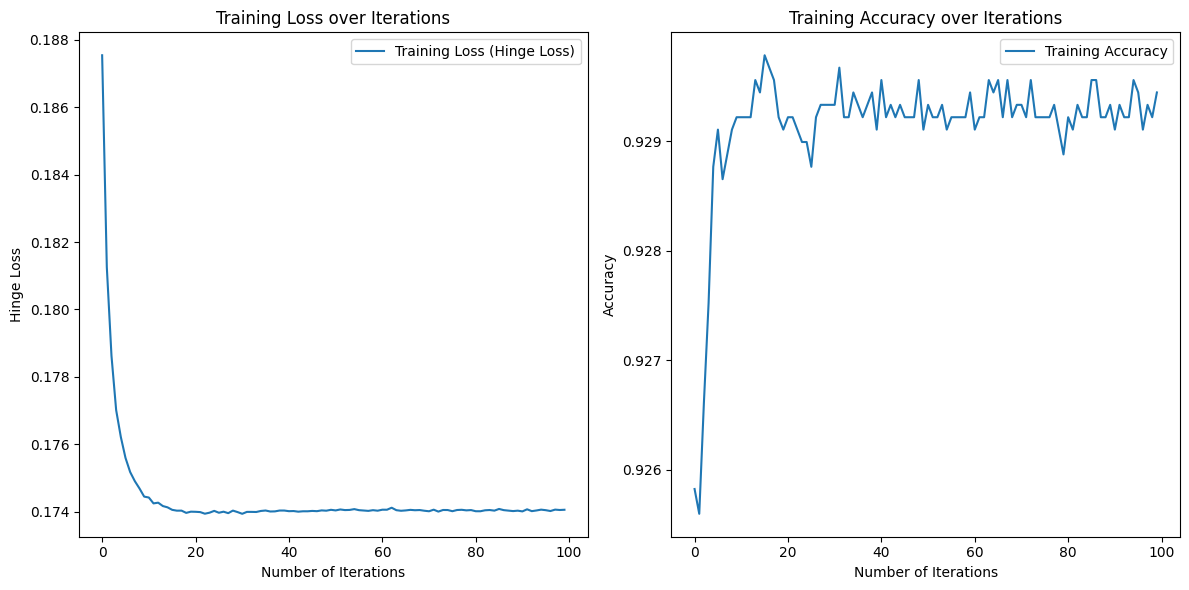

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import hinge_loss
from sklearn.linear_model import SGDClassifier

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Drop the index column
dataset = dataset.drop(columns=['index'])

# Convert target labels -1 to 0
dataset['Result'] = dataset['Result'].replace(-1, 0)

# Split the dataset into features and target
X = dataset.drop(columns=['Result'])
y = dataset['Result']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the SVM model
model = SVC(kernel='rbf', C=1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
def evaluate(model, X, y):
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    f1 = f1_score(y, predictions)
    return accuracy, precision, recall, f1

# Evaluate on training data
train_accuracy, train_precision, train_recall, train_f1 = evaluate(model, X_train, y_train)
print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')

# Evaluate on test data
test_accuracy, test_precision, test_recall, test_f1 = evaluate(model, X_test, y_test)
print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Use SGDClassifier to simulate training process with a lower learning rate
sgd_model = SGDClassifier(loss='hinge', alpha=1/(X_train.shape[0]), max_iter=1, tol=None, random_state=42, learning_rate='constant', eta0=0.001)  # Reduced learning rate

training_loss = []
training_accuracy = []

# Simulate training process
for _ in range(100):
    sgd_model.partial_fit(X_train, y_train, classes=[0, 1])
    predictions = sgd_model.predict(X_train)
    training_loss.append(hinge_loss(y_train, sgd_model.decision_function(X_train)))
    training_accuracy.append(accuracy_score(y_train, predictions))

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss (Hinge Loss)')
plt.xlabel('Number of Iterations')
plt.ylabel('Hinge Loss')
plt.title('Training Loss over Iterations')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


## CNN Implementation ( Relu as Activation )

Epoch: 010, Loss: 0.6026
Train - Accuracy: 0.7185, Precision: 0.6657, Recall: 0.9886, F1: 0.7956
Epoch: 020, Loss: 0.4461
Train - Accuracy: 0.8685, Precision: 0.8695, Recall: 0.8974, F1: 0.8832
Epoch: 030, Loss: 0.2976
Train - Accuracy: 0.8885, Precision: 0.9040, Recall: 0.8937, F1: 0.8989
Epoch: 040, Loss: 0.2340
Train - Accuracy: 0.9051, Precision: 0.9155, Recall: 0.9131, F1: 0.9143
Epoch: 050, Loss: 0.2038
Train - Accuracy: 0.9190, Precision: 0.9221, Recall: 0.9327, F1: 0.9274
Epoch: 060, Loss: 0.1844
Train - Accuracy: 0.9251, Precision: 0.9266, Recall: 0.9394, F1: 0.9329
Epoch: 070, Loss: 0.1700
Train - Accuracy: 0.9302, Precision: 0.9303, Recall: 0.9449, F1: 0.9376
Epoch: 080, Loss: 0.1588
Train - Accuracy: 0.9334, Precision: 0.9309, Recall: 0.9504, F1: 0.9405
Epoch: 090, Loss: 0.1503
Train - Accuracy: 0.9346, Precision: 0.9305, Recall: 0.9533, F1: 0.9418
Epoch: 100, Loss: 0.1431
Train - Accuracy: 0.9396, Precision: 0.9371, Recall: 0.9551, F1: 0.9460
Epoch: 110, Loss: 0.1371
Train

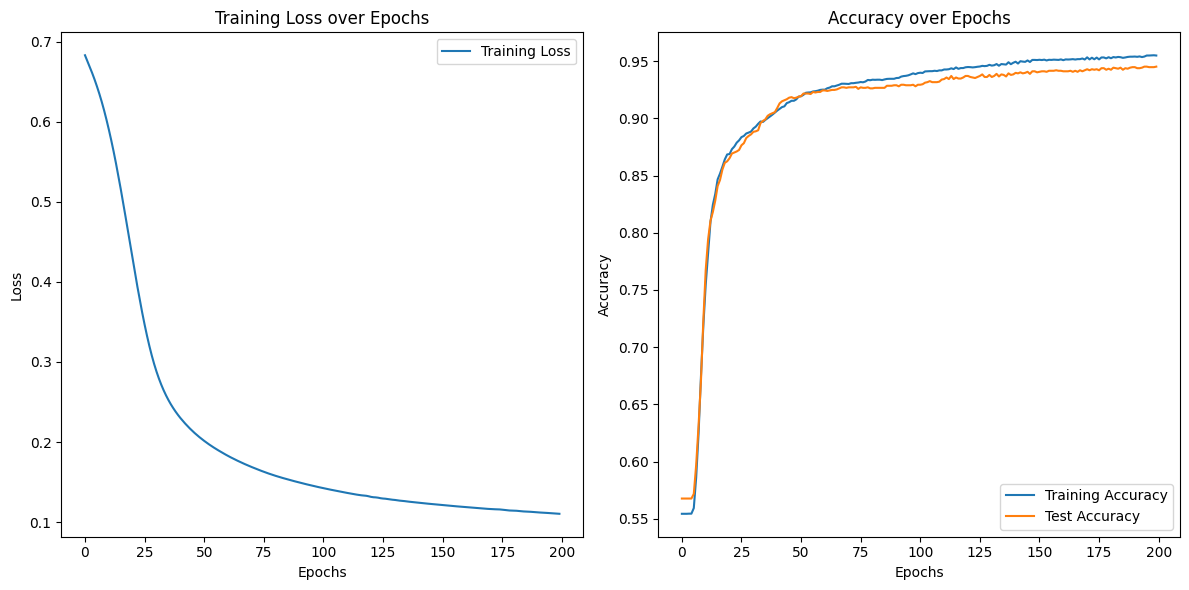

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Drop the index column
dataset = dataset.drop(columns=['index'])

# Convert target labels -1 to 0
dataset['Result'] = dataset['Result'].replace(-1, 0)

# Split the dataset into features and target
X = dataset.drop(columns=['Result'])
y = dataset['Result']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Add a channel dimension
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)  # Add a channel dimension
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * (X_train.shape[2] // 4), 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train_model():
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluate the model
def evaluate_model(data, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(labels.cpu(), predicted.cpu())
        precision = precision_score(labels.cpu(), predicted.cpu())
        recall = recall_score(labels.cpu(), predicted.cpu())
        f1 = f1_score(labels.cpu(), predicted.cpu())
    return accuracy, precision, recall, f1

# Lists to store the training and test metrics
train_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(1, 201):
    loss = train_model()
    train_losses.append(loss)

    train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(X_train, y_train)
    train_accuracies.append(train_accuracy)

    test_accuracy, _, _, _ = evaluate_model(X_test, y_test)
    test_accuracies.append(test_accuracy)

    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
        print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')

# Evaluate on test data
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(X_test, y_test)
print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Plot the training loss and accuracies
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


## CNN Implementation (Leaky Relu as Activation)

Epoch: 010, Loss: 0.6034
Train - Accuracy: 0.7815, Precision: 0.7290, Recall: 0.9645, F1: 0.8303
Epoch: 020, Loss: 0.4287
Train - Accuracy: 0.8416, Precision: 0.8398, Recall: 0.8825, F1: 0.8606
Epoch: 030, Loss: 0.3025
Train - Accuracy: 0.8766, Precision: 0.8936, Recall: 0.8825, F1: 0.8880
Epoch: 040, Loss: 0.2528
Train - Accuracy: 0.8967, Precision: 0.9100, Recall: 0.9029, F1: 0.9064
Epoch: 050, Loss: 0.2197
Train - Accuracy: 0.9114, Precision: 0.9182, Recall: 0.9223, F1: 0.9202
Epoch: 060, Loss: 0.1976
Train - Accuracy: 0.9215, Precision: 0.9261, Recall: 0.9329, F1: 0.9295
Epoch: 070, Loss: 0.1811
Train - Accuracy: 0.9292, Precision: 0.9300, Recall: 0.9433, F1: 0.9366
Epoch: 080, Loss: 0.1697
Train - Accuracy: 0.9327, Precision: 0.9322, Recall: 0.9476, F1: 0.9398
Epoch: 090, Loss: 0.1601
Train - Accuracy: 0.9363, Precision: 0.9331, Recall: 0.9535, F1: 0.9432
Epoch: 100, Loss: 0.1515
Train - Accuracy: 0.9388, Precision: 0.9357, Recall: 0.9553, F1: 0.9454
Epoch: 110, Loss: 0.1436
Train

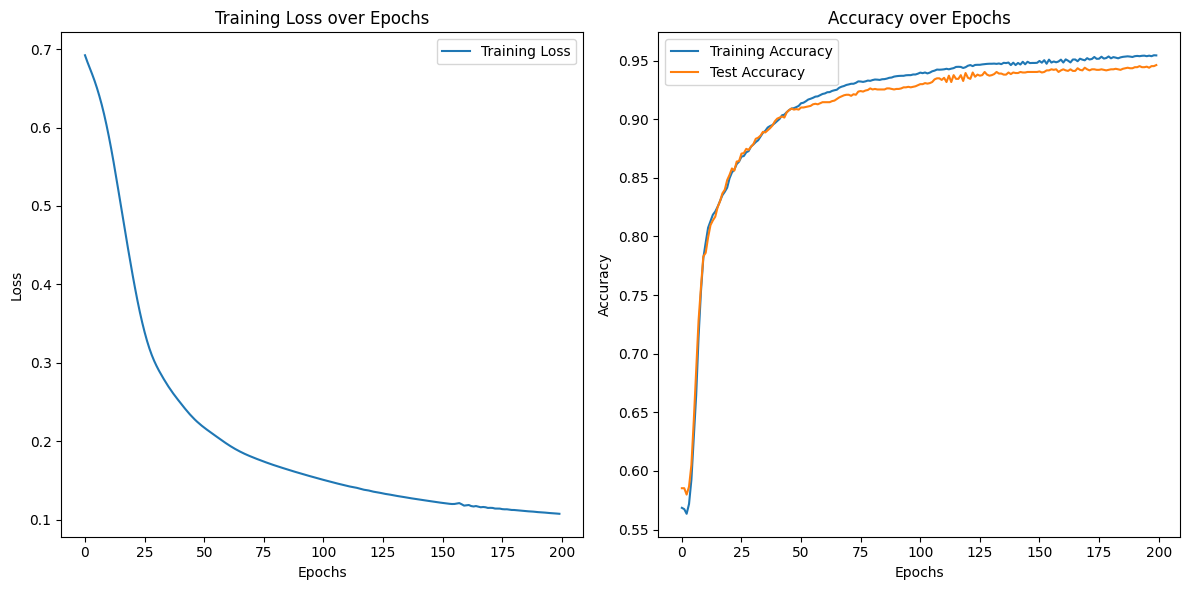

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Drop the index column
dataset = dataset.drop(columns=['index'])

# Convert target labels -1 to 0
dataset['Result'] = dataset['Result'].replace(-1, 0)

# Split the dataset into features and target
X = dataset.drop(columns=['Result'])
y = dataset['Result']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Add a channel dimension
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)  # Add a channel dimension
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define the CNN model with LeakyReLU
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
        self.fc1 = nn.Linear(32 * (X_train.shape[2] // 4), 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.pool(self.leaky_relu(self.conv1(x)))
        x = self.pool(self.leaky_relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model, define the loss function and the optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train_model():
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluate the model
def evaluate_model(data, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(labels.cpu(), predicted.cpu())
        precision = precision_score(labels.cpu(), predicted.cpu())
        recall = recall_score(labels.cpu(), predicted.cpu())
        f1 = f1_score(labels.cpu(), predicted.cpu())
    return accuracy, precision, recall, f1

# Lists to store the training and test metrics
train_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(1, 201):
    loss = train_model()
    train_losses.append(loss)

    train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(X_train, y_train)
    train_accuracies.append(train_accuracy)

    test_accuracy, _, _, _ = evaluate_model(X_test, y_test)
    test_accuracies.append(test_accuracy)

    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
        print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')

# Evaluate on test data
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(X_test, y_test)
print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Plot the training loss and accuracies
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


## KNN Classifier

KNN Train - Accuracy: 0.9665, Precision: 0.9658, Recall: 0.9741, F1: 0.9699
KNN Test - Accuracy: 0.9408, Precision: 0.9411, Recall: 0.9554, F1: 0.9482


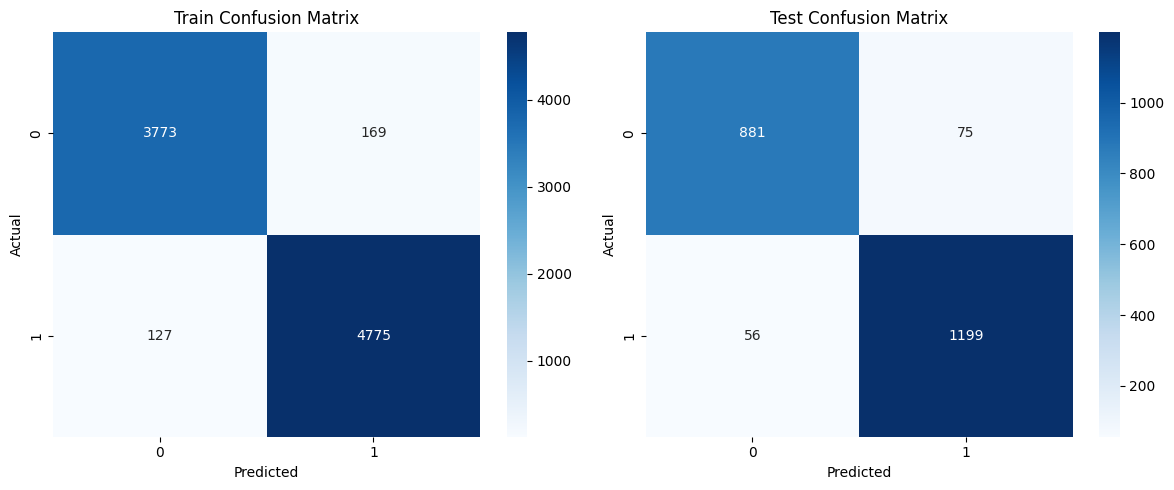

In [ ]:
import torch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Drop the index column
dataset = dataset.drop(columns=['index'])

# Convert target labels -1 to 0
dataset['Result'] = dataset['Result'].replace(-1, 0)

# Split the dataset into features and target
X = dataset.drop(columns=['Result'])
y = dataset['Result']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.numpy(), y_train.numpy())

# Make predictions on the train set
y_train_pred = knn.predict(X_train.numpy())

# Make predictions on the test set
y_test_pred = knn.predict(X_test.numpy())

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train.numpy(), y_train_pred)
train_precision = precision_score(y_train.numpy(), y_train_pred)
train_recall = recall_score(y_train.numpy(), y_train_pred)
train_f1 = f1_score(y_train.numpy(), y_train_pred)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test.numpy(), y_test_pred)
test_precision = precision_score(y_test.numpy(), y_test_pred)
test_recall = recall_score(y_test.numpy(), y_test_pred)
test_f1 = f1_score(y_test.numpy(), y_test_pred)

print(f'KNN Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')
print(f'KNN Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Plotting confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Confusion matrix for training set
cm_train = confusion_matrix(y_train.numpy(), y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for test set
cm_test = confusion_matrix(y_test.numpy(), y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


## Logistic Regression

Epoch: 010, Loss: 0.5773
Train - Accuracy: 0.7350, Precision: 0.7538, Recall: 0.7750, F1: 0.7642
Epoch: 020, Loss: 0.5425
Train - Accuracy: 0.7751, Precision: 0.7818, Recall: 0.8244, F1: 0.8025
Epoch: 030, Loss: 0.5124
Train - Accuracy: 0.8099, Precision: 0.8085, Recall: 0.8611, F1: 0.8339
Epoch: 040, Loss: 0.4863
Train - Accuracy: 0.8342, Precision: 0.8292, Recall: 0.8827, F1: 0.8551
Epoch: 050, Loss: 0.4636
Train - Accuracy: 0.8529, Precision: 0.8455, Recall: 0.8988, F1: 0.8714
Epoch: 060, Loss: 0.4436
Train - Accuracy: 0.8666, Precision: 0.8567, Recall: 0.9119, F1: 0.8834
Epoch: 070, Loss: 0.4259
Train - Accuracy: 0.8763, Precision: 0.8649, Recall: 0.9206, F1: 0.8919
Epoch: 080, Loss: 0.4101
Train - Accuracy: 0.8814, Precision: 0.8703, Recall: 0.9237, F1: 0.8962
Epoch: 090, Loss: 0.3960
Train - Accuracy: 0.8866, Precision: 0.8757, Recall: 0.9270, F1: 0.9006
Epoch: 100, Loss: 0.3833
Train - Accuracy: 0.8924, Precision: 0.8798, Recall: 0.9333, F1: 0.9058
Epoch: 110, Loss: 0.3719
Train

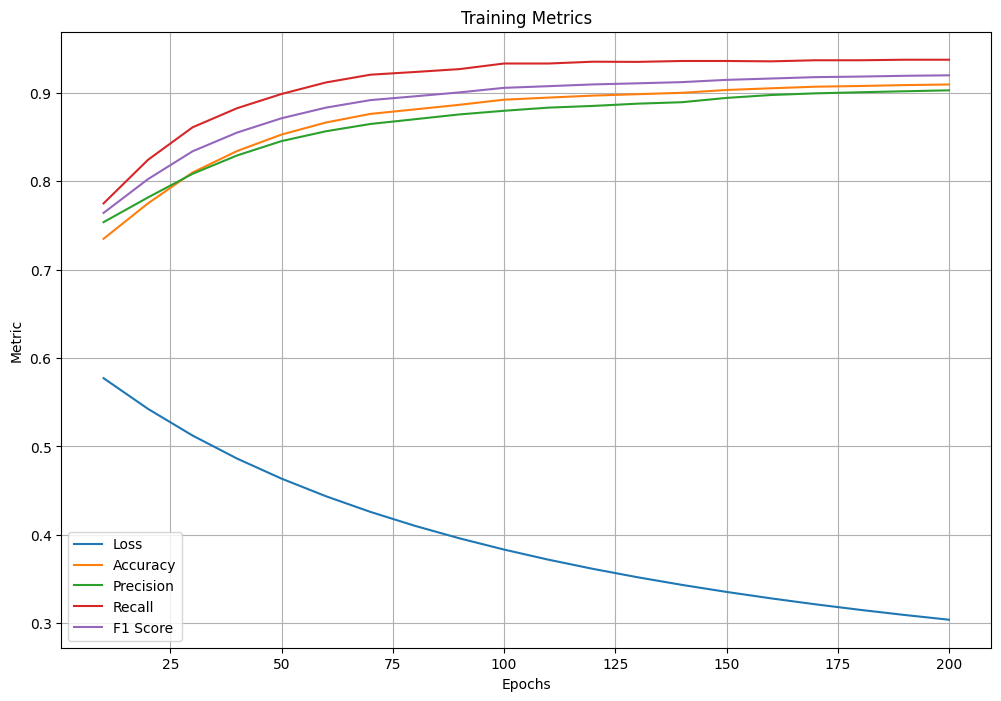

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the Logistic Regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 2)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, define the loss function and the optimizer
model = LogisticRegression(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train_model():
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluate the model
def evaluate_model(data, labels):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(labels.cpu(), predicted.cpu())
        precision = precision_score(labels.cpu(), predicted.cpu())
        recall = recall_score(labels.cpu(), predicted.cpu())
        f1 = f1_score(labels.cpu(), predicted.cpu())
    return accuracy, precision, recall, f1

# Store metrics for plotting
train_metrics = {
    'loss': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

# Training loop
for epoch in range(1, 201):
    loss = train_model()
    if epoch % 10 == 0:
        train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(X_train, y_train)
        train_metrics['loss'].append(loss)
        train_metrics['accuracy'].append(train_accuracy)
        train_metrics['precision'].append(train_precision)
        train_metrics['recall'].append(train_recall)
        train_metrics['f1'].append(train_f1)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
        print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')

# Evaluate on test data
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(X_test, y_test)
print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Plot metrics
epochs = range(10, 201, 10)
plt.figure(figsize=(12, 8))
plt.plot(epochs, train_metrics['loss'], label='Loss')
plt.plot(epochs, train_metrics['accuracy'], label='Accuracy')
plt.plot(epochs, train_metrics['precision'], label='Precision')
plt.plot(epochs, train_metrics['recall'], label='Recall')
plt.plot(epochs, train_metrics['f1'], label='F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.title('Training Metrics')
plt.legend()
plt.grid(True)
plt.show()


## RESNET

Epoch: 010, Loss: 0.1571
Train - Accuracy: 0.9313, Precision: 0.9451, Recall: 0.9300, F1: 0.9375
Test - Accuracy: 0.9240, Precision: 0.9394, Recall: 0.9259, F1: 0.9326
Epoch: 020, Loss: 0.1108
Train - Accuracy: 0.9510, Precision: 0.9645, Recall: 0.9466, F1: 0.9554
Test - Accuracy: 0.9349, Precision: 0.9483, Recall: 0.9363, F1: 0.9423
Epoch: 030, Loss: 0.0688
Train - Accuracy: 0.9703, Precision: 0.9662, Recall: 0.9806, F1: 0.9734
Test - Accuracy: 0.9552, Precision: 0.9523, Recall: 0.9697, F1: 0.9609
Epoch: 040, Loss: 0.0400
Train - Accuracy: 0.9726, Precision: 0.9574, Recall: 0.9949, F1: 0.9758
Test - Accuracy: 0.9552, Precision: 0.9372, Recall: 0.9873, F1: 0.9616
Epoch: 050, Loss: 0.0316
Train - Accuracy: 0.9839, Precision: 0.9756, Recall: 0.9959, F1: 0.9857
Test - Accuracy: 0.9625, Precision: 0.9522, Recall: 0.9833, F1: 0.9675
Epoch: 060, Loss: 0.0227
Train - Accuracy: 0.9893, Precision: 0.9839, Recall: 0.9969, F1: 0.9904
Test - Accuracy: 0.9625, Precision: 0.9550, Recall: 0.9801, F1:

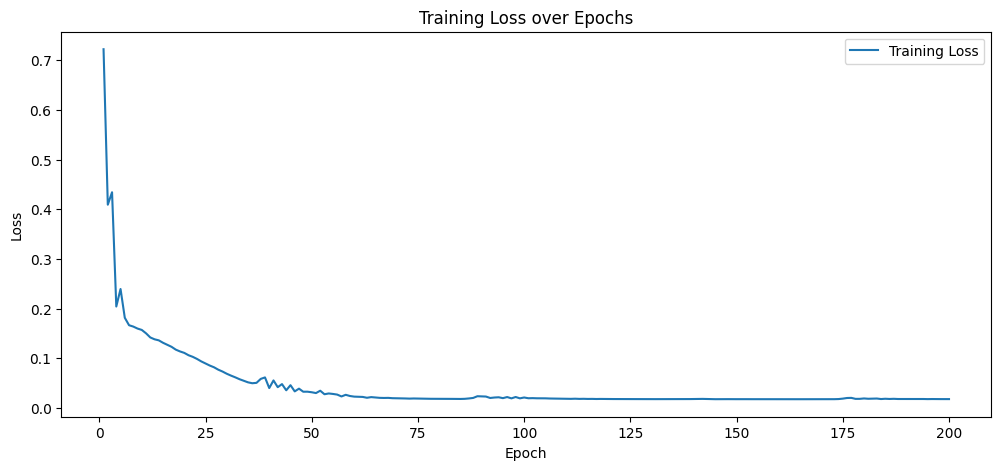

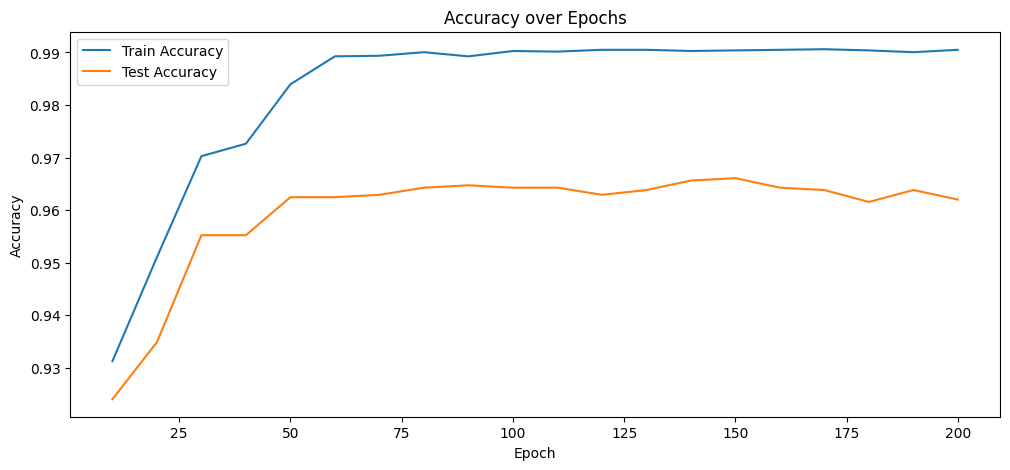

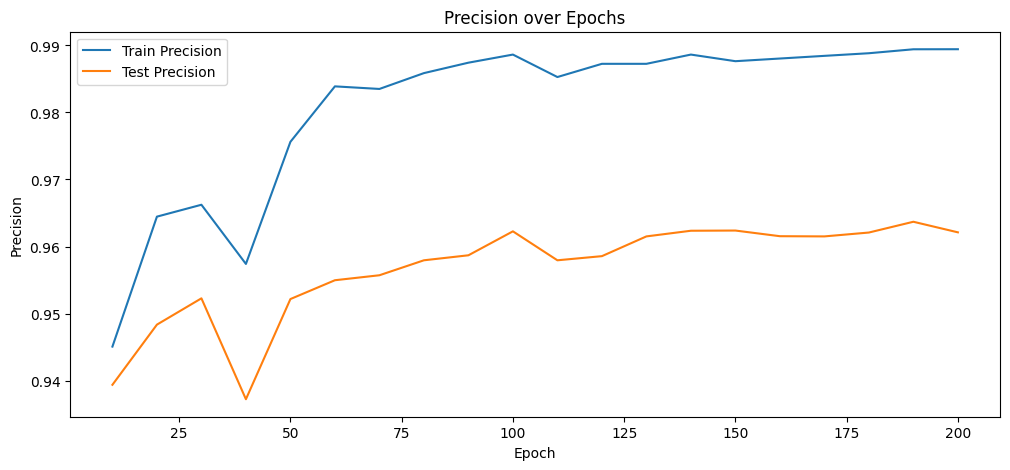

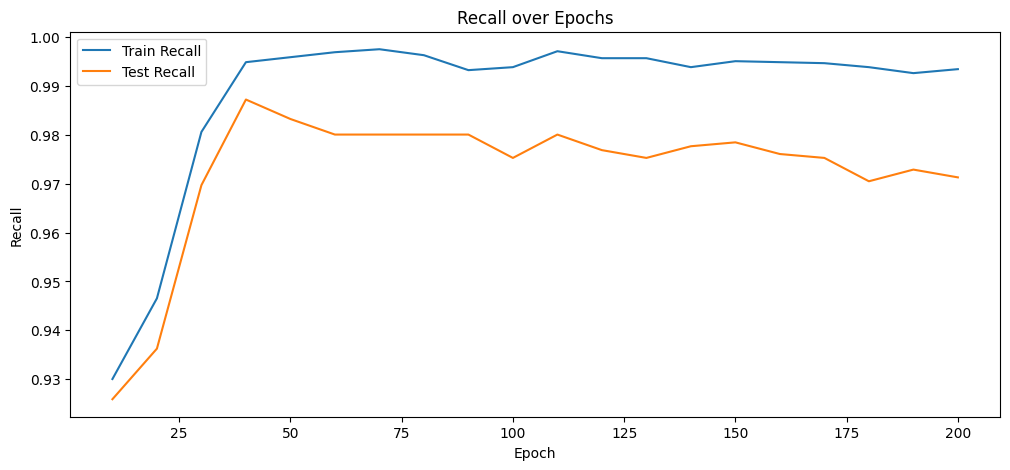

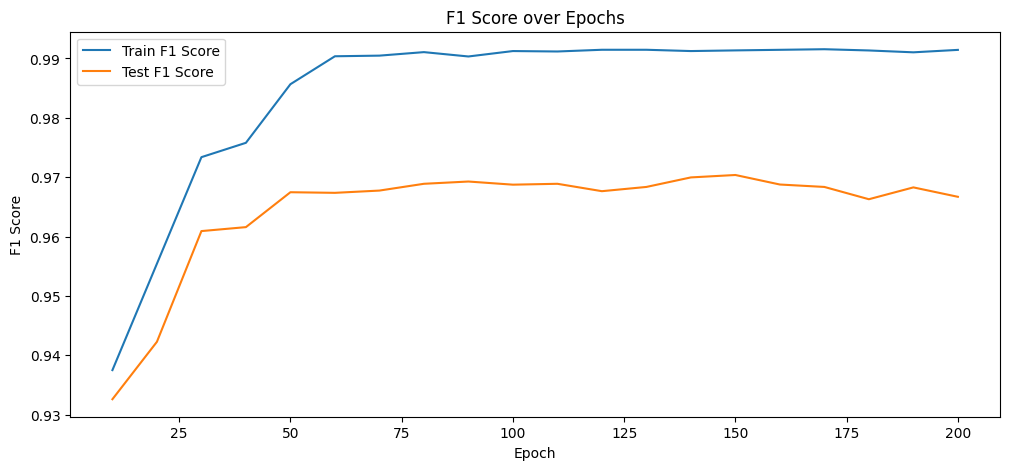

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Drop the index column
dataset = dataset.drop(columns=['index'])

# Convert target labels -1 to 0
dataset['Result'] = dataset['Result'].replace(-1, 0)

# Split the dataset into features and target
X = dataset.drop(columns=['Result'])
y = dataset['Result']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define the ResNet block
class ResidualBlock(nn.Module):
    def __init__(self, in_features):
        super(ResidualBlock, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(in_features, in_features),
            nn.BatchNorm1d(in_features),
            nn.ReLU(inplace=True),
            nn.Linear(in_features, in_features),
            nn.BatchNorm1d(in_features)
        )

    def forward(self, x):
        residual = x
        out = self.layer(x)
        out += residual
        out = F.relu(out)
        return out

# Define the ResNet model
class ResNet(nn.Module):
    def __init__(self, num_features, num_classes):
        super(ResNet, self).__init__()
        self.input_layer = nn.Linear(num_features, 64)
        self.block1 = ResidualBlock(64)
        self.block2 = ResidualBlock(64)
        self.block3 = ResidualBlock(64)
        self.output_layer = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.input_layer(x))
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.output_layer(x)
        return F.log_softmax(x, dim=1)

# Model parameters
num_features = X_train.shape[1]
num_classes = 2  # Phishing or not

# Instantiate the model
model = ResNet(num_features, num_classes)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Training the model
def train():
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluate the model
def evaluate(data, labels):
    model.eval()
    with torch.no_grad():
        output = model(data)
        pred = output.argmax(dim=1)
        accuracy = accuracy_score(labels.cpu(), pred.cpu())
        precision = precision_score(labels.cpu(), pred.cpu())
        recall = recall_score(labels.cpu(), pred.cpu())
        f1 = f1_score(labels.cpu(), pred.cpu())
    return accuracy, precision, recall, f1

# Store metrics
losses = []
train_accuracies, train_precisions, train_recalls, train_f1s = [], [], [], []
test_accuracies, test_precisions, test_recalls, test_f1s = [], [], [], []

# Training loop
for epoch in range(1, 201):
    loss = train()
    losses.append(loss)
    if epoch % 10 == 0:
        train_accuracy, train_precision, train_recall, train_f1 = evaluate(X_train, y_train)
        test_accuracy, test_precision, test_recall, test_f1 = evaluate(X_test, y_test)
        train_accuracies.append(train_accuracy)
        train_precisions.append(train_precision)
        train_recalls.append(train_recall)
        train_f1s.append(train_f1)
        test_accuracies.append(test_accuracy)
        test_precisions.append(test_precision)
        test_recalls.append(test_recall)
        test_f1s.append(test_f1)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
        print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')
        print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Plotting training loss over epochs
plt.figure(figsize=(12, 5))
plt.plot(range(1, 201), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Plotting evaluation metrics
epochs = range(10, 201, 10)

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_precisions, label='Train Precision')
plt.plot(epochs, test_precisions, label='Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_recalls, label='Train Recall')
plt.plot(epochs, test_recalls, label='Test Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_f1s, label='Train F1 Score')
plt.plot(epochs, test_f1s, label='Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score over Epochs')
plt.legend()
plt.show()


## TYPES OF RESNETS

### PreActResidual Implementation

Epoch: 010, Loss: 0.2434
Train - Accuracy: 0.9240, Precision: 0.9556, Recall: 0.9049, F1: 0.9296
Test - Accuracy: 0.9150, Precision: 0.9487, Recall: 0.8988, F1: 0.9231
Epoch: 020, Loss: 0.1517
Train - Accuracy: 0.9406, Precision: 0.9553, Recall: 0.9368, F1: 0.9459
Test - Accuracy: 0.9349, Precision: 0.9448, Recall: 0.9402, F1: 0.9425
Epoch: 030, Loss: 0.1266
Train - Accuracy: 0.9490, Precision: 0.9431, Recall: 0.9663, F1: 0.9546
Test - Accuracy: 0.9403, Precision: 0.9363, Recall: 0.9602, F1: 0.9481
Epoch: 040, Loss: 0.1044
Train - Accuracy: 0.9542, Precision: 0.9500, Recall: 0.9684, F1: 0.9591
Test - Accuracy: 0.9430, Precision: 0.9400, Recall: 0.9610, F1: 0.9504
Epoch: 050, Loss: 0.0801
Train - Accuracy: 0.9668, Precision: 0.9599, Recall: 0.9810, F1: 0.9703
Test - Accuracy: 0.9530, Precision: 0.9458, Recall: 0.9729, F1: 0.9592
Epoch: 060, Loss: 0.0549
Train - Accuracy: 0.9738, Precision: 0.9622, Recall: 0.9916, F1: 0.9767
Test - Accuracy: 0.9570, Precision: 0.9455, Recall: 0.9809, F1:

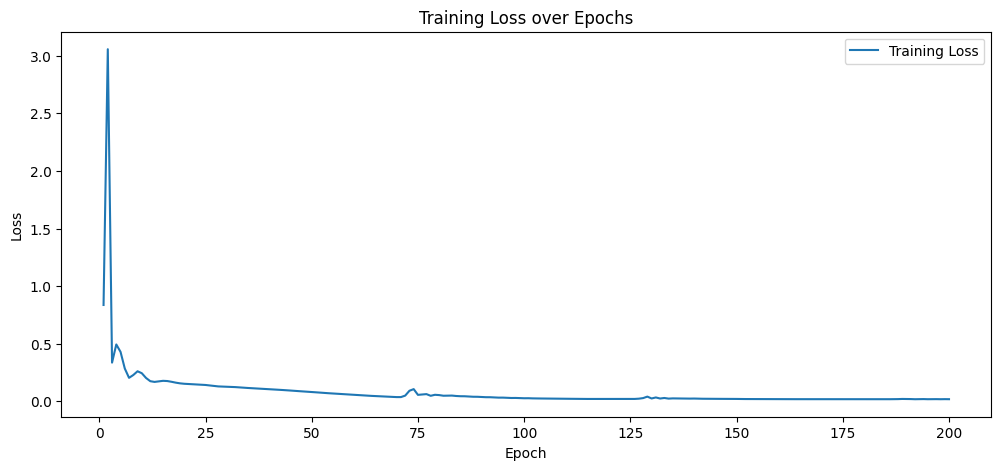

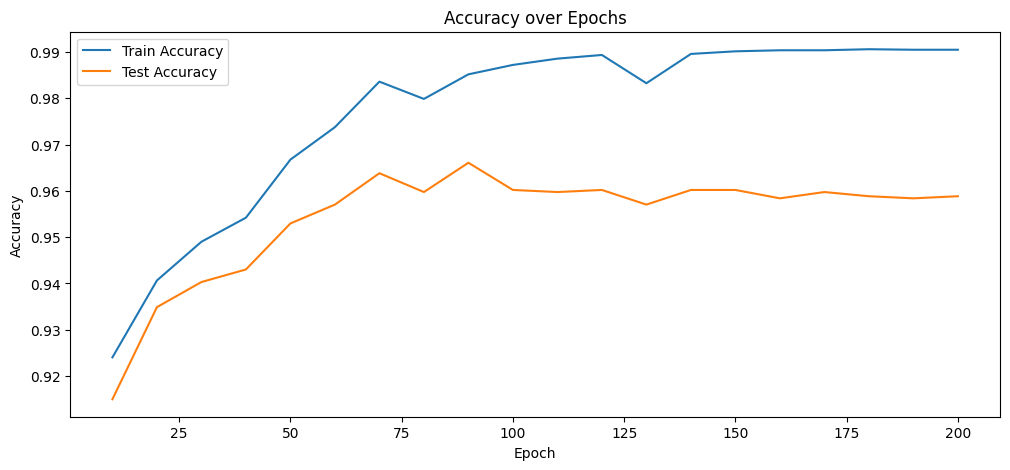

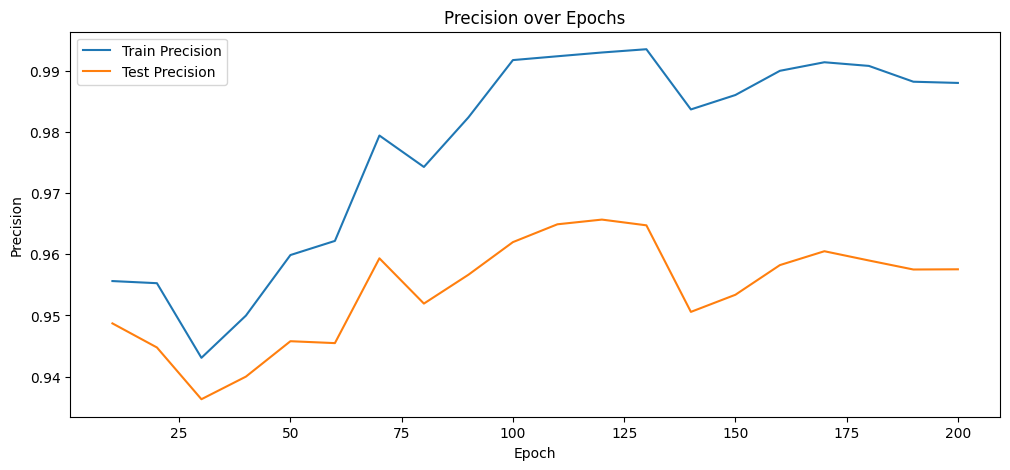

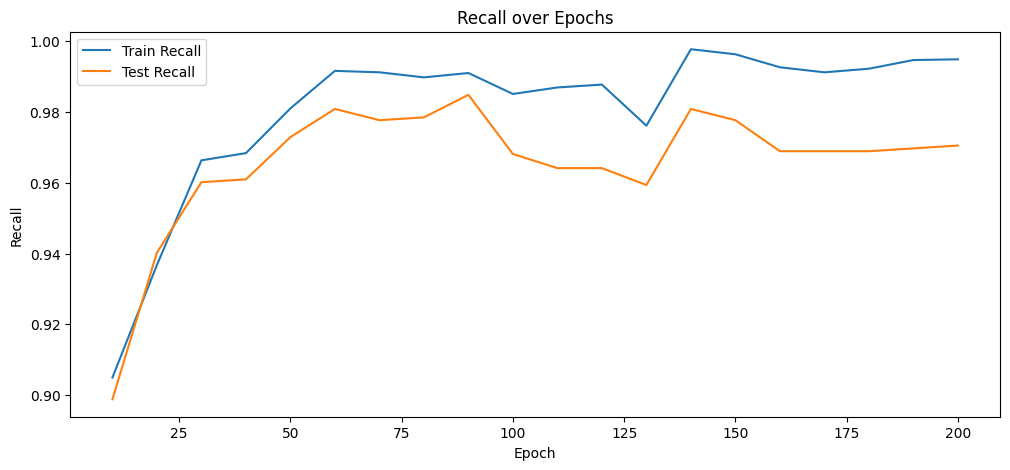

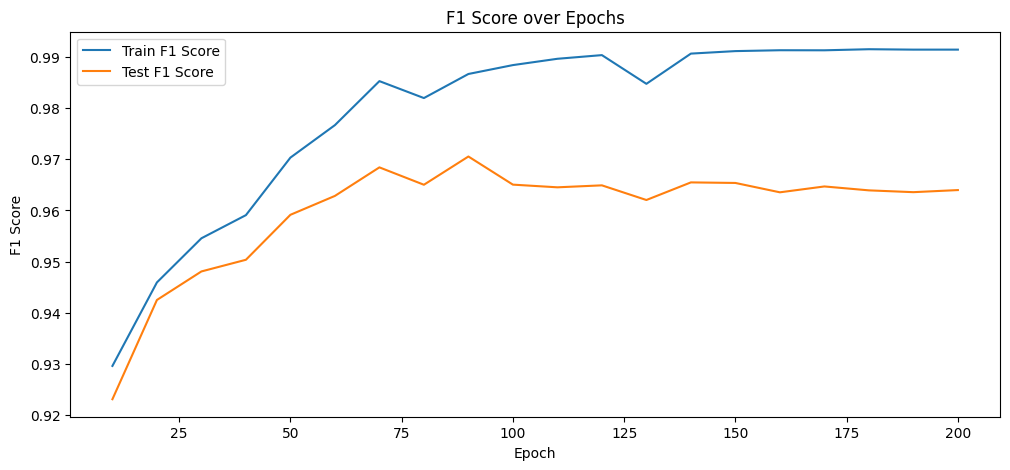

In [ ]:
# Define the PreActResNet block
class PreActResidualBlock(nn.Module):
    def __init__(self, in_features, out_features, downsample=False):
        super(PreActResidualBlock, self).__init__()
        self.downsample = downsample
        self.layer = nn.Sequential(
            nn.BatchNorm1d(in_features),
            nn.ReLU(inplace=True),
            nn.Linear(in_features, out_features),
            nn.BatchNorm1d(out_features),
            nn.ReLU(inplace=True),
            nn.Linear(out_features, out_features)
        )
        self.shortcut = nn.Sequential()
        if downsample or in_features != out_features:
            self.shortcut = nn.Sequential(
                nn.Linear(in_features, out_features)
            )

    def forward(self, x):
        residual = self.shortcut(x)
        out = self.layer(x)
        out += residual
        return out

# Define the PreActResNet model
class PreActResNet(nn.Module):
    def __init__(self, num_features, num_classes, layers):
        super(PreActResNet, self).__init__()
        self.input_layer = nn.Linear(num_features, 64)
        self.residual_blocks = self._make_layers(64, layers)
        self.output_layer = nn.Linear(64, num_classes)

    def _make_layers(self, in_features, layers):
        layers_list = []
        for out_features in layers:
            layers_list.append(PreActResidualBlock(in_features, out_features, downsample=(in_features != out_features)))
            in_features = out_features
        return nn.Sequential(*layers_list)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.residual_blocks(x)
        x = self.output_layer(x)
        return F.log_softmax(x, dim=1)

# Model parameters for PreActResNet
layers = [64]*8  # Example configuration for PreActResNet
num_features = X_train.shape[1]
num_classes = 2  # Phishing or not

# Instantiate the model
model = PreActResNet(num_features, num_classes, layers)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train(model, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluate the model
def evaluate(model, data, labels):
    model.eval()
    with torch.no_grad():
        output = model(data)
        pred = output.argmax(dim=1)
        accuracy = accuracy_score(labels.cpu(), pred.cpu())
        precision = precision_score(labels.cpu(), pred.cpu())
        recall = recall_score(labels.cpu(), pred.cpu())
        f1 = f1_score(labels.cpu(), pred.cpu())
    return accuracy, precision, recall, f1

# Store metrics
losses = []
train_accuracies, train_precisions, train_recalls, train_f1s = [], [], [], []
test_accuracies, test_precisions, test_recalls, test_f1s = [], [], [], []

# Training loop
for epoch in range(1, 201):
    loss = train(model, optimizer, criterion)
    losses.append(loss)
    if epoch % 10 == 0:
        train_accuracy, train_precision, train_recall, train_f1 = evaluate(model, X_train, y_train)
        test_accuracy, test_precision, test_recall, test_f1 = evaluate(model, X_test, y_test)
        train_accuracies.append(train_accuracy)
        train_precisions.append(train_precision)
        train_recalls.append(train_recall)
        train_f1s.append(train_f1)
        test_accuracies.append(test_accuracy)
        test_precisions.append(test_precision)
        test_recalls.append(test_recall)
        test_f1s.append(test_f1)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
        print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')
        print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Plotting training loss over epochs
plt.figure(figsize=(12, 5))
plt.plot(range(1, 201), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Plotting evaluation metrics
epochs = range(10, 201, 10)

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_precisions, label='Train Precision')
plt.plot(epochs, test_precisions, label='Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_recalls, label='Train Recall')
plt.plot(epochs, test_recalls, label='Test Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_f1s, label='Train F1 Score')
plt.plot(epochs, test_f1s, label='Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score over Epochs')
plt.legend()
plt.show()


### WideResidual Implementation

Epoch: 010, Loss: 0.1820
Train - Accuracy: 0.8692, Precision: 0.9284, Recall: 0.8278, F1: 0.8752
Test - Accuracy: 0.8661, Precision: 0.9293, Recall: 0.8271, F1: 0.8752
Epoch: 020, Loss: 0.1326
Train - Accuracy: 0.9454, Precision: 0.9438, Recall: 0.9586, F1: 0.9511
Test - Accuracy: 0.9340, Precision: 0.9376, Recall: 0.9466, F1: 0.9421
Epoch: 030, Loss: 0.1039
Train - Accuracy: 0.9545, Precision: 0.9533, Recall: 0.9653, F1: 0.9593
Test - Accuracy: 0.9412, Precision: 0.9419, Recall: 0.9554, F1: 0.9486
Epoch: 040, Loss: 0.0795
Train - Accuracy: 0.9665, Precision: 0.9700, Recall: 0.9696, F1: 0.9698
Test - Accuracy: 0.9525, Precision: 0.9528, Recall: 0.9641, F1: 0.9584
Epoch: 050, Loss: 0.0509
Train - Accuracy: 0.9784, Precision: 0.9754, Recall: 0.9859, F1: 0.9806
Test - Accuracy: 0.9597, Precision: 0.9562, Recall: 0.9737, F1: 0.9649
Epoch: 060, Loss: 0.0435
Train - Accuracy: 0.9774, Precision: 0.9646, Recall: 0.9957, F1: 0.9799
Test - Accuracy: 0.9584, Precision: 0.9442, Recall: 0.9849, F1:

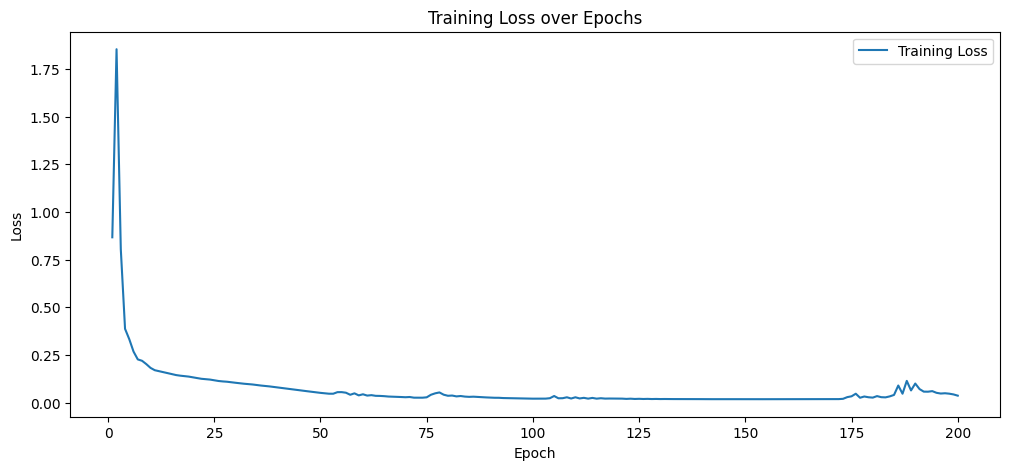

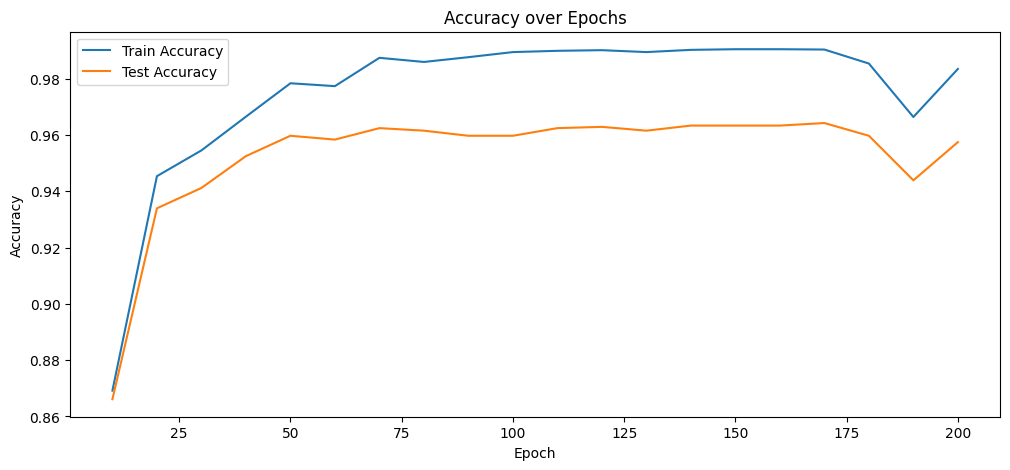

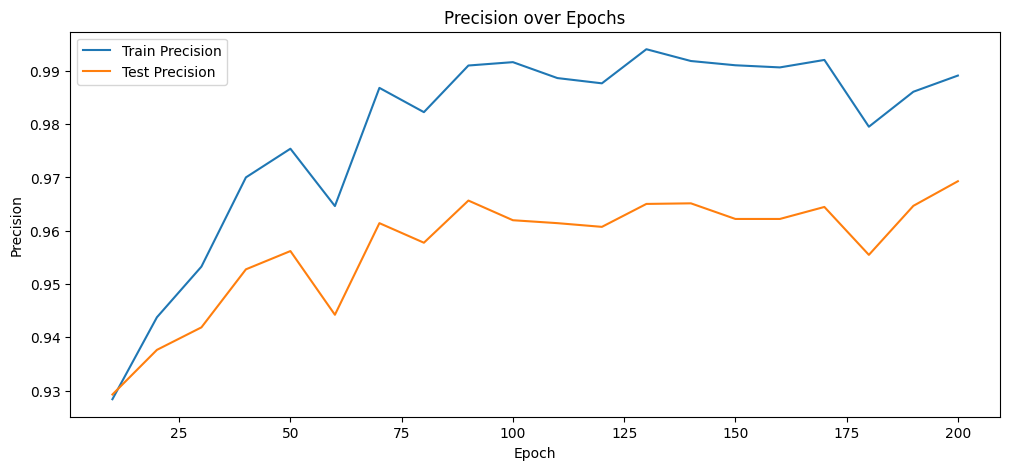

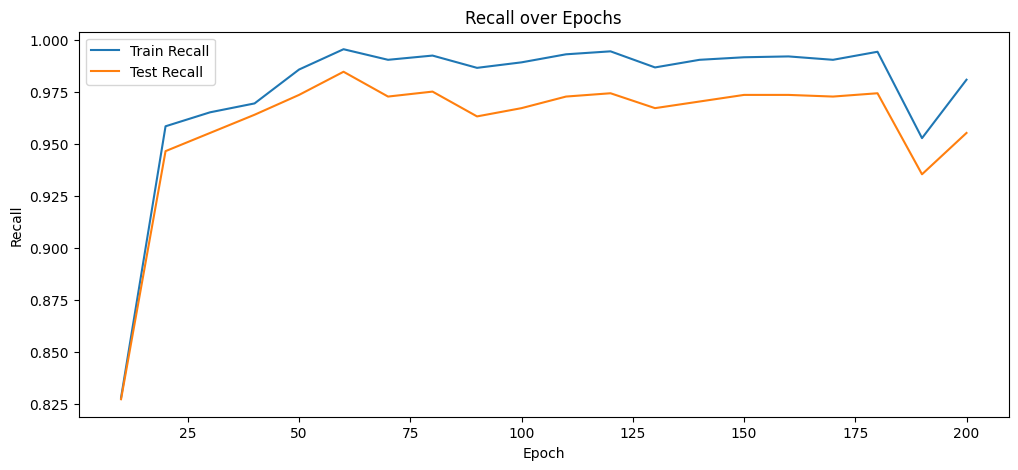

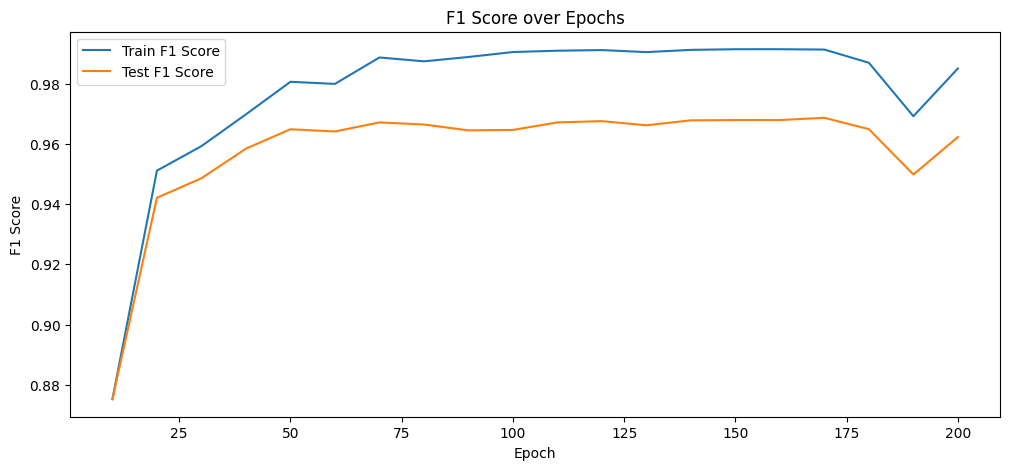

In [ ]:
# Define the WideResNet block
class WideResidualBlock(nn.Module):
    def __init__(self, in_features, out_features, widen_factor=2, downsample=False):
        super(WideResidualBlock, self).__init__()
        self.downsample = downsample
        widened_out_features = out_features * widen_factor
        self.layer = nn.Sequential(
            nn.Linear(in_features, widened_out_features),
            nn.BatchNorm1d(widened_out_features),
            nn.ReLU(inplace=True),
            nn.Linear(widened_out_features, out_features),
            nn.BatchNorm1d(out_features)
        )
        self.shortcut = nn.Sequential()
        if downsample or in_features != out_features:
            self.shortcut = nn.Sequential(
                nn.Linear(in_features, out_features),
                nn.BatchNorm1d(out_features)
            )

    def forward(self, x):
        residual = self.shortcut(x)
        out = self.layer(x)
        out += residual
        out = F.relu(out)
        return out

# Define the WideResNet model
class WideResNet(nn.Module):
    def __init__(self, num_features, num_classes, layers, widen_factor=2):
        super(WideResNet, self).__init__()
        self.input_layer = nn.Linear(num_features, 64)
        self.residual_blocks = self._make_layers(64, layers, widen_factor)
        self.output_layer = nn.Linear(64, num_classes)

    def _make_layers(self, in_features, layers, widen_factor):
        layers_list = []
        for out_features in layers:
            layers_list.append(WideResidualBlock(in_features, out_features, widen_factor, downsample=(in_features != out_features)))
            in_features = out_features
        return nn.Sequential(*layers_list)

    def forward(self, x):
        x = F.relu(self.input_layer(x))
        x = self.residual_blocks(x)
        x = self.output_layer(x)
        return F.log_softmax(x, dim=1)

# Model parameters for WideResNet
layers = [64]*8  # Example configuration for WideResNet
num_features = X_train.shape[1]
num_classes = 2  # Phishing or not

# Instantiate the model
model = WideResNet(num_features, num_classes, layers, widen_factor=2)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train(model, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluate the model
def evaluate(model, data, labels):
    model.eval()
    with torch.no_grad():
        output = model(data)
        pred = output.argmax(dim=1)
        accuracy = accuracy_score(labels.cpu(), pred.cpu())
        precision = precision_score(labels.cpu(), pred.cpu())
        recall = recall_score(labels.cpu(), pred.cpu())
        f1 = f1_score(labels.cpu(), pred.cpu())
    return accuracy, precision, recall, f1

# Store metrics
losses = []
train_accuracies, train_precisions, train_recalls, train_f1s = [], [], [], []
test_accuracies, test_precisions, test_recalls, test_f1s = [], [], [], []

# Training loop
for epoch in range(1, 201):
    loss = train(model, optimizer, criterion)
    losses.append(loss)
    if epoch % 10 == 0:
        train_accuracy, train_precision, train_recall, train_f1 = evaluate(model, X_train, y_train)
        test_accuracy, test_precision, test_recall, test_f1 = evaluate(model, X_test, y_test)
        train_accuracies.append(train_accuracy)
        train_precisions.append(train_precision)
        train_recalls.append(train_recall)
        train_f1s.append(train_f1)
        test_accuracies.append(test_accuracy)
        test_precisions.append(test_precision)
        test_recalls.append(test_recall)
        test_f1s.append(test_f1)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
        print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')
        print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Plotting training loss over epochs
plt.figure(figsize=(12, 5))
plt.plot(range(1, 201), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Plotting evaluation metrics
epochs = range(10, 201, 10)

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_precisions, label='Train Precision')
plt.plot(epochs, test_precisions, label='Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_recalls, label='Train Recall')
plt.plot(epochs, test_recalls, label='Test Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_f1s, label='Train F1 Score')
plt.plot(epochs, test_f1s, label='Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score over Epochs')
plt.legend()
plt.show()


### ResNeXt Implementation

Epoch: 010, Loss: 0.2630
Train - Accuracy: 0.6437, Precision: 0.9761, Recall: 0.3662, F1: 0.5326
Test - Accuracy: 0.6228, Precision: 0.9647, Recall: 0.3482, F1: 0.5117
Epoch: 020, Loss: 0.1616
Train - Accuracy: 0.7137, Precision: 0.9950, Recall: 0.4859, F1: 0.6530
Test - Accuracy: 0.6911, Precision: 0.9914, Recall: 0.4598, F1: 0.6282
Epoch: 030, Loss: 0.1422
Train - Accuracy: 0.8867, Precision: 0.9719, Recall: 0.8193, F1: 0.8891
Test - Accuracy: 0.8847, Precision: 0.9735, Recall: 0.8191, F1: 0.8897
Epoch: 040, Loss: 0.1228
Train - Accuracy: 0.8882, Precision: 0.9895, Recall: 0.8068, F1: 0.8889
Test - Accuracy: 0.8815, Precision: 0.9872, Recall: 0.8016, F1: 0.8848
Epoch: 050, Loss: 0.1149
Train - Accuracy: 0.9268, Precision: 0.9778, Recall: 0.8882, F1: 0.9308
Test - Accuracy: 0.9263, Precision: 0.9731, Recall: 0.8948, F1: 0.9323
Epoch: 060, Loss: 0.1225
Train - Accuracy: 0.9469, Precision: 0.9671, Recall: 0.9359, F1: 0.9513
Test - Accuracy: 0.9385, Precision: 0.9575, Recall: 0.9331, F1:

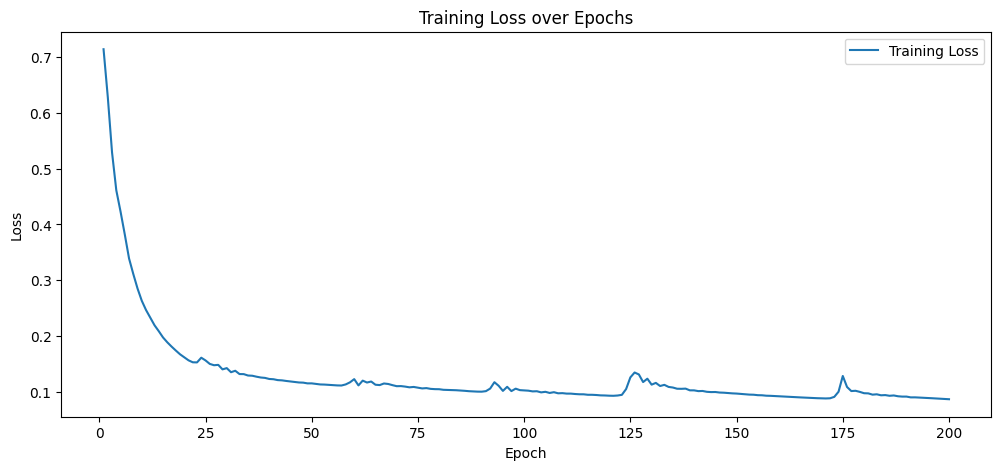

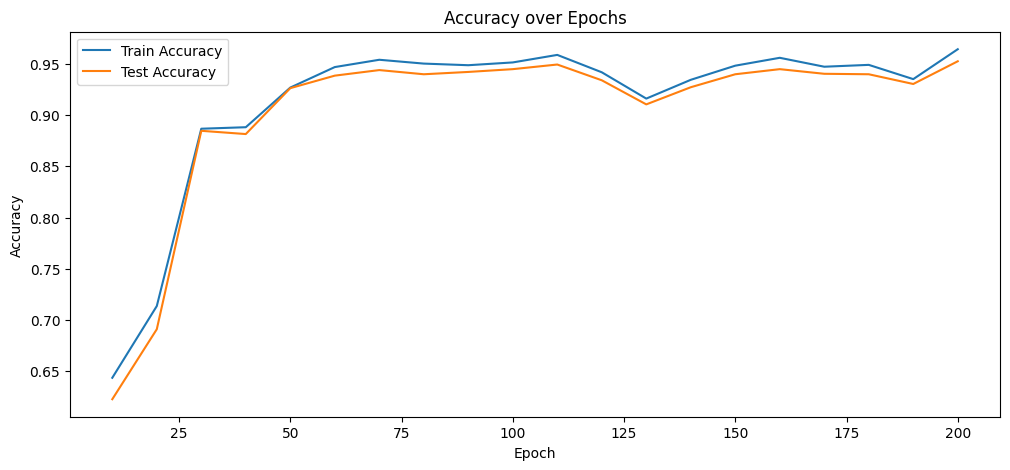

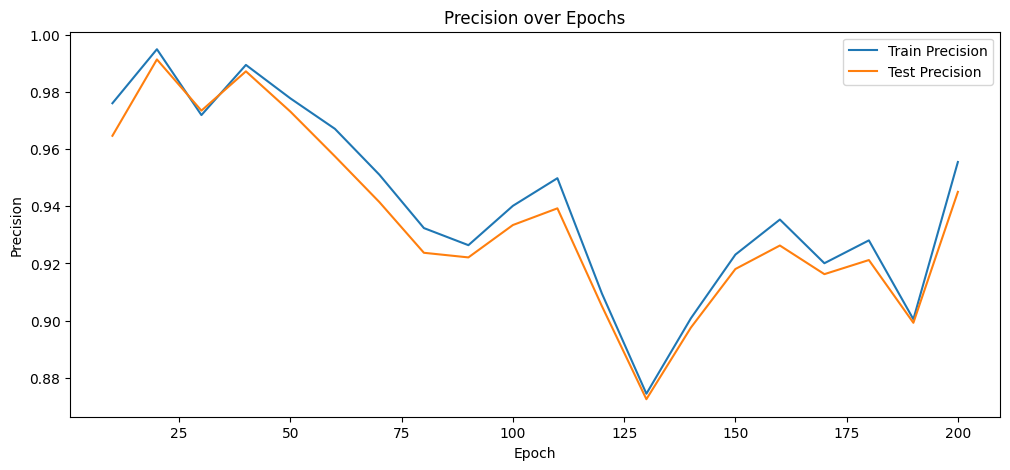

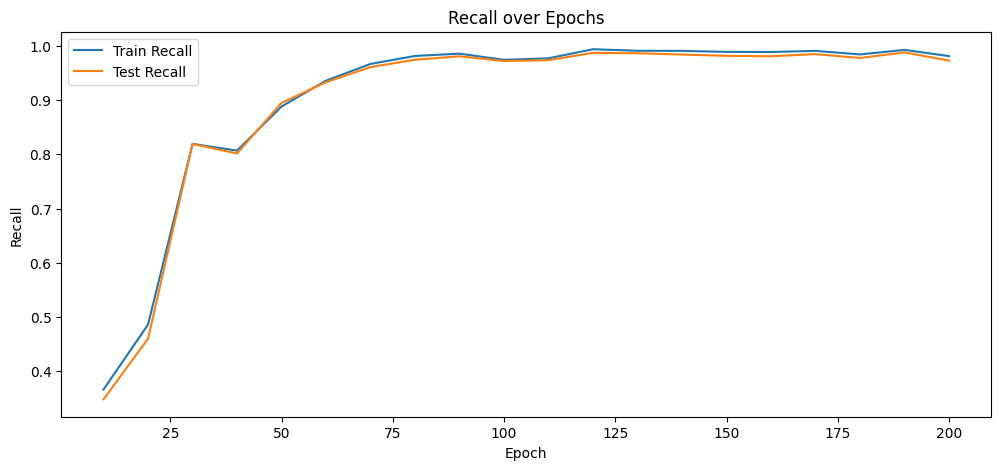

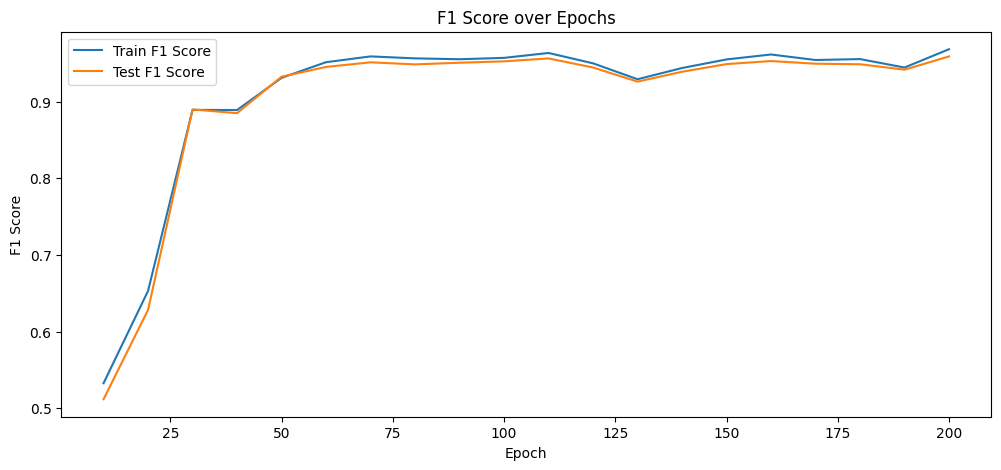

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Drop the index column
dataset = dataset.drop(columns=['index'])

# Convert target labels -1 to 0
dataset['Result'] = dataset['Result'].replace(-1, 0)

# Split the dataset into features and target
X = dataset.drop(columns=['Result'])
y = dataset['Result']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define the ResNeXt block
class ResNeXtBlock(nn.Module):
    def __init__(self, in_channels, cardinality, bottleneck_width, stride=1):
        super(ResNeXtBlock, self).__init__()
        D = cardinality * bottleneck_width
        self.conv1 = nn.Conv1d(in_channels, D, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm1d(D)
        self.conv2 = nn.Conv1d(D, D, kernel_size=3, stride=stride, padding=1, groups=cardinality, bias=False)
        self.bn2 = nn.BatchNorm1d(D)
        self.conv3 = nn.Conv1d(D, in_channels, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm1d(in_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != in_channels:
            self.shortcut = nn.Sequential(
                nn.Conv1d(in_channels, in_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(in_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

# Define the ResNeXt model
class ResNeXt(nn.Module):
    def __init__(self, num_features, num_classes, cardinality=8, bottleneck_width=4, num_blocks=3):
        super(ResNeXt, self).__init__()
        self.conv1 = nn.Conv1d(1, num_features, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm1d(num_features)
        self.layer1 = self._make_layer(num_features, cardinality, bottleneck_width, num_blocks)
        self.fc = nn.Linear(num_features, num_classes)

    def _make_layer(self, in_channels, cardinality, bottleneck_width, num_blocks):
        layers = []
        for _ in range(num_blocks):
            layers.append(ResNeXtBlock(in_channels, cardinality, bottleneck_width))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = F.adaptive_avg_pool1d(x, 1).squeeze()
        x = self.fc(x)
        return F.log_softmax(x, dim=1)

# Model parameters
num_features = X_train.shape[1]
num_classes = 2  # Phishing or not

# Instantiate the model
model = ResNeXt(num_features, num_classes)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train(model, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluate the model
def evaluate(model, data, labels):
    model.eval()
    with torch.no_grad():
        output = model(data)
        pred = output.argmax(dim=1)
        accuracy = accuracy_score(labels.cpu(), pred.cpu())
        precision = precision_score(labels.cpu(), pred.cpu())
        recall = recall_score(labels.cpu(), pred.cpu())
        f1 = f1_score(labels.cpu(), pred.cpu())
    return accuracy, precision, recall, f1

# Store metrics
losses = []
train_accuracies, train_precisions, train_recalls, train_f1s = [], [], [], []
test_accuracies, test_precisions, test_recalls, test_f1s = [], [], [], []

# Training loop
for epoch in range(1, 201):
    loss = train(model, optimizer, criterion)
    losses.append(loss)
    if epoch % 10 == 0:
        train_accuracy, train_precision, train_recall, train_f1 = evaluate(model, X_train, y_train)
        test_accuracy, test_precision, test_recall, test_f1 = evaluate(model, X_test, y_test)
        train_accuracies.append(train_accuracy)
        train_precisions.append(train_precision)
        train_recalls.append(train_recall)
        train_f1s.append(train_f1)
        test_accuracies.append(test_accuracy)
        test_precisions.append(test_precision)
        test_recalls.append(test_recall)
        test_f1s.append(test_f1)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
        print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')
        print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Plotting training loss over epochs
plt.figure(figsize=(12, 5))
plt.plot(range(1, 201), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Plotting evaluation metrics
epochs = range(10, 201, 10)

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_precisions, label='Train Precision')
plt.plot(epochs, test_precisions, label='Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_recalls, label='Train Recall')
plt.plot(epochs, test_recalls, label='Test Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_f1s, label='Train F1 Score')
plt.plot(epochs, test_f1s, label='Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score over Epochs')
plt.legend()
plt.show()


### DenseNet Implementation

Epoch: 010, Loss: 0.1659
Train - Accuracy: 0.9344, Precision: 0.9242, Recall: 0.9604, F1: 0.9420
Test - Accuracy: 0.9322, Precision: 0.9234, Recall: 0.9602, F1: 0.9414
Epoch: 020, Loss: 0.1200
Train - Accuracy: 0.9479, Precision: 0.9501, Recall: 0.9561, F1: 0.9531
Test - Accuracy: 0.9426, Precision: 0.9399, Recall: 0.9602, F1: 0.9499
Epoch: 030, Loss: 0.0815
Train - Accuracy: 0.9639, Precision: 0.9714, Recall: 0.9633, F1: 0.9673
Test - Accuracy: 0.9493, Precision: 0.9525, Recall: 0.9586, F1: 0.9555
Epoch: 040, Loss: 0.0526
Train - Accuracy: 0.9768, Precision: 0.9784, Recall: 0.9798, F1: 0.9791
Test - Accuracy: 0.9625, Precision: 0.9600, Recall: 0.9745, F1: 0.9672
Epoch: 050, Loss: 0.0392
Train - Accuracy: 0.9846, Precision: 0.9842, Recall: 0.9882, F1: 0.9862
Test - Accuracy: 0.9634, Precision: 0.9557, Recall: 0.9809, F1: 0.9681
Epoch: 060, Loss: 0.0307
Train - Accuracy: 0.9862, Precision: 0.9834, Recall: 0.9918, F1: 0.9876
Test - Accuracy: 0.9629, Precision: 0.9550, Recall: 0.9809, F1:

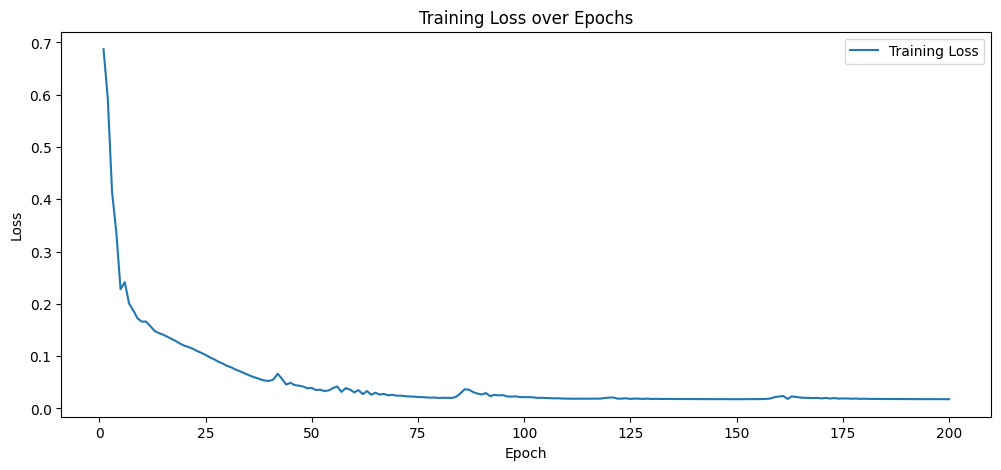

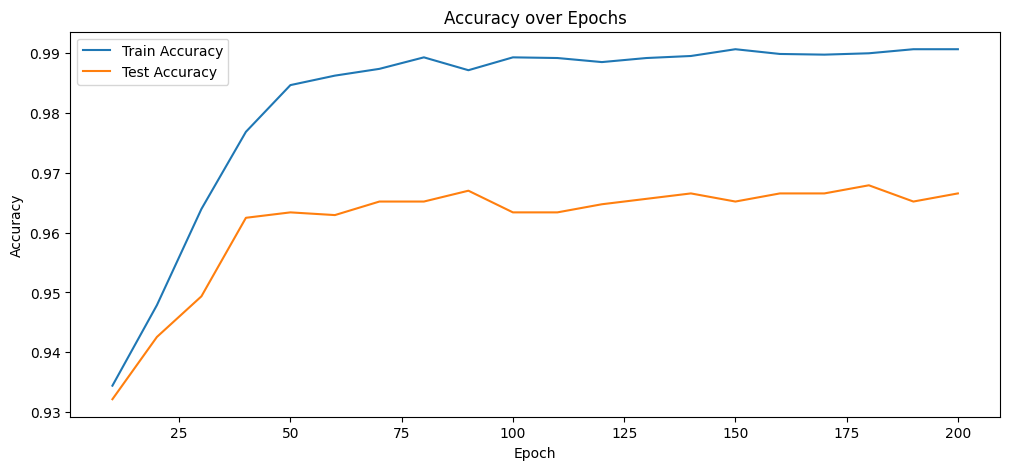

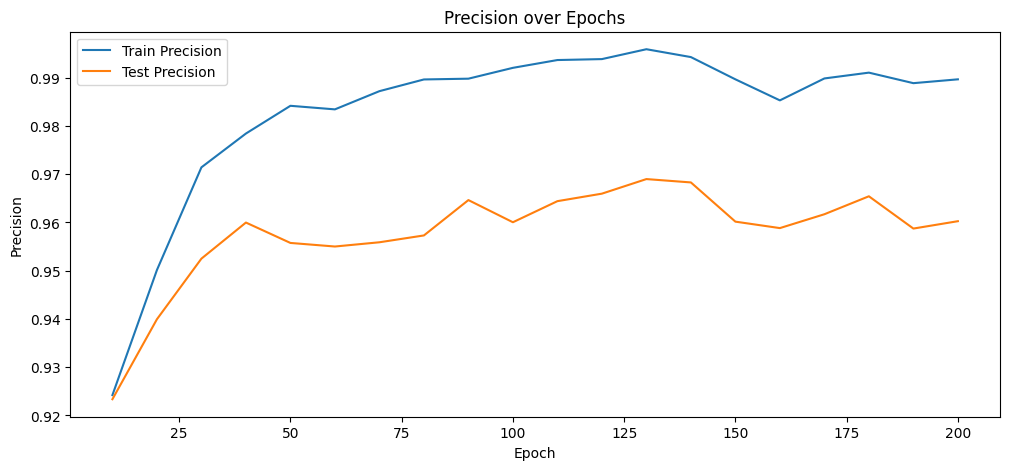

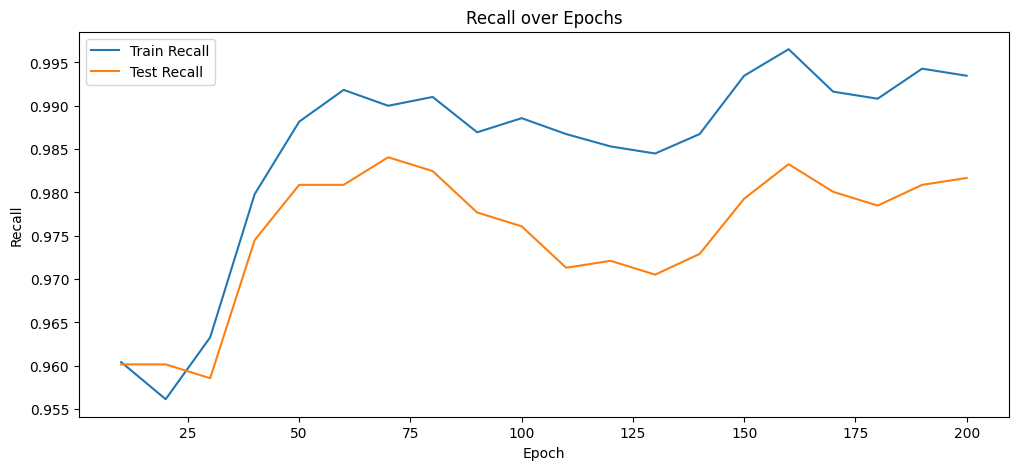

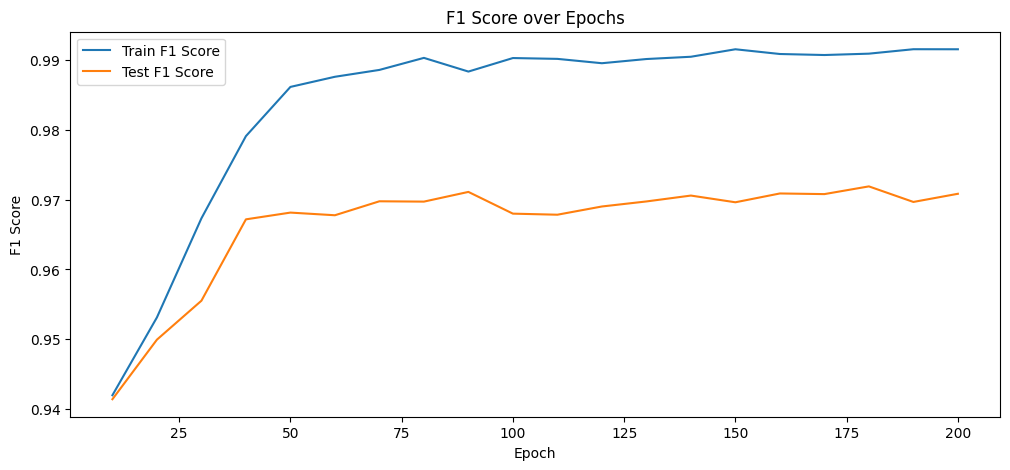

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('dataset.csv')

# Drop the index column
dataset = dataset.drop(columns=['index'])

# Convert target labels -1 to 0
dataset['Result'] = dataset['Result'].replace(-1, 0)

# Split the dataset into features and target
X = dataset.drop(columns=['Result'])
y = dataset['Result']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define the DenseNet block
class DenseBlock(nn.Module):
    def __init__(self, in_features, growth_rate, num_layers):
        super(DenseBlock, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(num_layers):
            layer = nn.Sequential(
                nn.Linear(in_features + i * growth_rate, growth_rate),
                nn.BatchNorm1d(growth_rate),
                nn.ReLU(inplace=True)
            )
            self.layers.append(layer)

    def forward(self, x):
        features = [x]
        for layer in self.layers:
            new_features = layer(torch.cat(features, dim=1))
            features.append(new_features)
        return torch.cat(features, dim=1)

# Define the DenseNet model
class DenseNet(nn.Module):
    def __init__(self, num_features, num_classes, growth_rate=32, num_layers_per_block=4):
        super(DenseNet, self).__init__()
        self.input_layer = nn.Linear(num_features, growth_rate)
        self.dense_block1 = DenseBlock(growth_rate, growth_rate, num_layers_per_block)
        self.transition_layer1 = nn.Linear(growth_rate + num_layers_per_block * growth_rate, growth_rate)
        self.dense_block2 = DenseBlock(growth_rate, growth_rate, num_layers_per_block)
        self.transition_layer2 = nn.Linear(growth_rate + num_layers_per_block * growth_rate, growth_rate)
        self.output_layer = nn.Linear(growth_rate, num_classes)

    def forward(self, x):
        x = F.relu(self.input_layer(x))
        x = self.dense_block1(x)
        x = F.relu(self.transition_layer1(x))
        x = self.dense_block2(x)
        x = F.relu(self.transition_layer2(x))
        x = self.output_layer(x)
        return F.log_softmax(x, dim=1)

# Model parameters
num_features = X_train.shape[1]
num_classes = 2  # Phishing or not

# Instantiate the model
model = DenseNet(num_features, num_classes)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train(model, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluate the model
def evaluate(model, data, labels):
    model.eval()
    with torch.no_grad():
        output = model(data)
        pred = output.argmax(dim=1)
        accuracy = accuracy_score(labels.cpu(), pred.cpu())
        precision = precision_score(labels.cpu(), pred.cpu())
        recall = recall_score(labels.cpu(), pred.cpu())
        f1 = f1_score(labels.cpu(), pred.cpu())
    return accuracy, precision, recall, f1

# Store metrics
losses = []
train_accuracies, train_precisions, train_recalls, train_f1s = [], [], [], []
test_accuracies, test_precisions, test_recalls, test_f1s = [], [], [], []

# Training loop
for epoch in range(1, 201):
    loss = train(model, optimizer, criterion)
    losses.append(loss)
    if epoch % 10 == 0:
        train_accuracy, train_precision, train_recall, train_f1 = evaluate(model, X_train, y_train)
        test_accuracy, test_precision, test_recall, test_f1 = evaluate(model, X_test, y_test)
        train_accuracies.append(train_accuracy)
        train_precisions.append(train_precision)
        train_recalls.append(train_recall)
        train_f1s.append(train_f1)
        test_accuracies.append(test_accuracy)
        test_precisions.append(test_precision)
        test_recalls.append(test_recall)
        test_f1s.append(test_f1)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
        print(f'Train - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')
        print(f'Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

# Plotting training loss over epochs
plt.figure(figsize=(12, 5))
plt.plot(range(1, 201), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Plotting evaluation metrics
epochs = range(10, 201, 10)

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_precisions, label='Train Precision')
plt.plot(epochs, test_precisions, label='Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Precision over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_recalls, label='Train Recall')
plt.plot(epochs, test_recalls, label='Test Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_f1s, label='Train F1 Score')
plt.plot(epochs, test_f1s, label='Test F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score over Epochs')
plt.legend()
plt.show()
